In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%load_ext line_profiler

In [2]:
def fitness(x,y):
    return 2**x + 2**y 
    return (10 - y + x)*2**y + (10 - x + y)*2**x + 10*2**np.abs(y - x)

def noise(x,y, bits_per_side):
    return np.random.uniform(0.5, 1, size = (bits_per_side, bits_per_side))

@np.vectorize
def fit_pred(x,y):
    return 2**float(x) + 2**(float(x) - float(y))

@np.vectorize
def fit_prey(x,y):
    return 2**float(y) - 2**(float(x) - float(y))

@np.vectorize
def fit_coop_pred(x,y):
    return 2**float(x) + 2**float(y)

@np.vectorize
def fit_coop_prey(x,y):
    return 2**float(y) + 2**float(x)


def create_fitness_landscape(bits_per_side, fit_func):
    mesh_x, mesh_y = np.meshgrid(np.arange(0, bits_per_side), np.arange(0, bits_per_side))
    noise_land = noise(mesh_x, mesh_y, bits_per_side)
    pure_fitness_land = fit_func(mesh_x, mesh_y)
    return mesh_x, mesh_y, (pure_fitness_land * noise_land), noise_land, pure_fitness_land

In [3]:
def create_set_of_fit_landscapes(n, fit_prey, fit_pred):
    x_pred, y_prey, full_fit_land_prey , noise_prey, fit_prey = create_fitness_landscape(n, fit_prey)
    x_pred, y_prey, full_fit_land_pred , noise_pred, fit_pred = create_fitness_landscape(n, fit_pred)
    full_fit_land_sum = np.add(full_fit_land_pred, full_fit_land_prey)
    return full_fit_land_prey, full_fit_land_pred, full_fit_land_sum, x_pred, y_prey

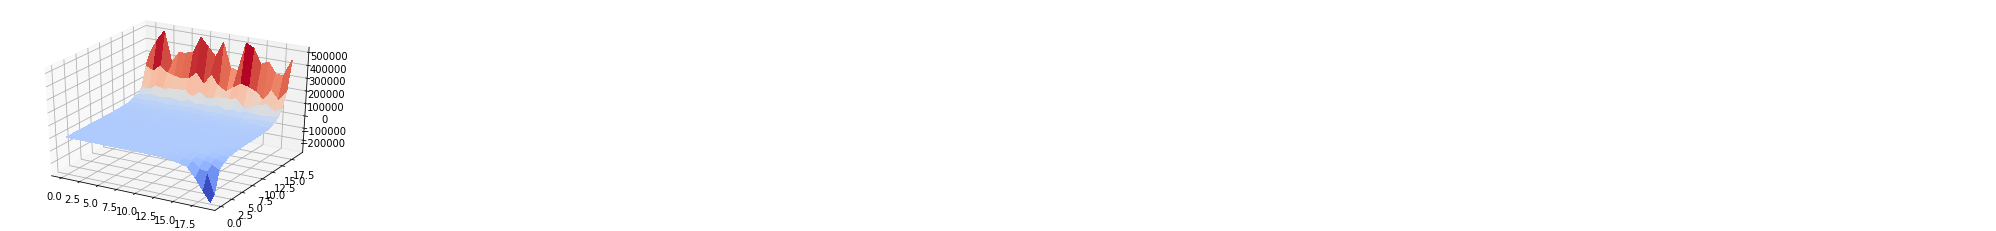

In [80]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x_pred, y_prey,full_fit_land_prey , cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


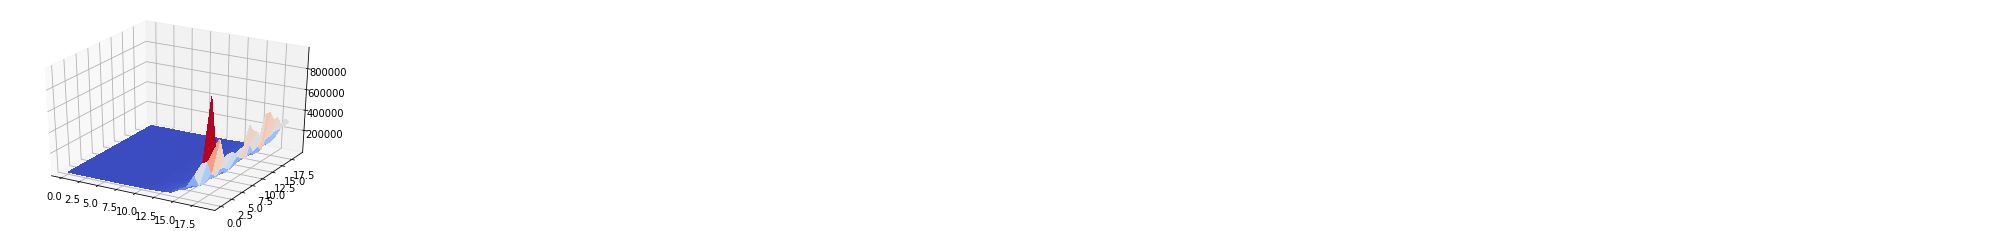

In [81]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x_pred, y_prey, full_fit_land_pred , cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

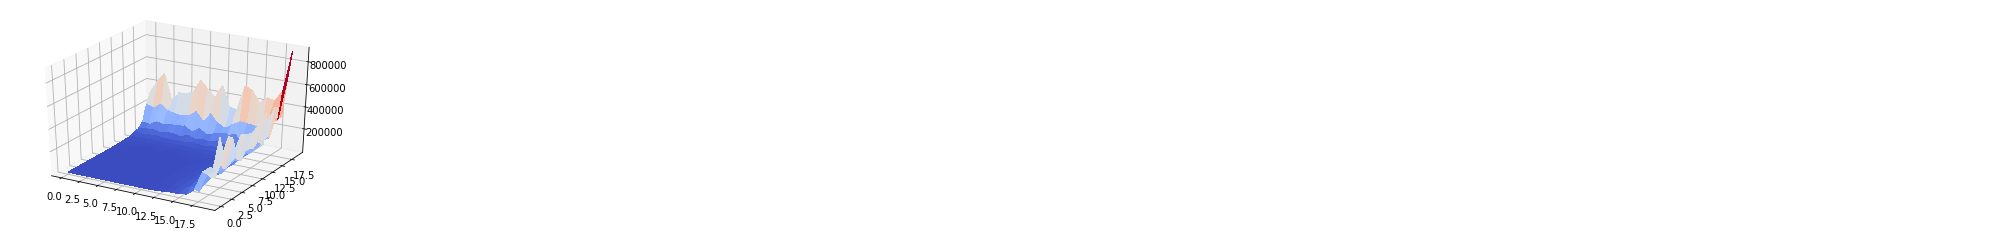

In [82]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x_pred, y_prey, full_fit_land_sum, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [311]:

def objective_fitness(pred, prey):
    return full_fit_land_sum[prey , pred]

def get_corpus_of_ones(agents):
    return [max(sum(t) -1, 0)  for t in agents]

#Here with a fixed prey, we get the score against variaous preds 
def play_a_selection_of_opposition_pred(preds, prey, no_of_ops):
    opp = np.random.randint(0, len(preds), no_of_ops)
    return np.mean([full_fit_land_prey[preds[pred], prey] for pred in opp])

def play_a_selection_of_opposition_prey(pred, preys, no_of_ops):
    opp = np.random.randint(0, len(preys), no_of_ops)
    return np.mean([full_fit_land_pred[pred, preys[prey]] for prey in opp])

def tournements(preds_in, preys_in, no_of_ops, no_of_bits):
    preds = get_corpus_of_ones(preds_in)
    preys = get_corpus_of_ones(preys_in)
    prey_res = [play_a_selection_of_opposition_pred(preds, p, no_of_ops) for p in preys]
    pred_res = [play_a_selection_of_opposition_prey(p, preys, no_of_ops) for p in preds]
    pred_ex = [preds[i] for i in np.random.randint(0,len(preds), no_of_ops)]
    prey_ex = [preys[i] for i in np.random.randint(0,len(preys), no_of_ops)]
    total = np.max(objective_fitness(pred_ex, prey_ex))
    return pred_res, prey_res, total
    


In [5]:
full_fit_land_prey, full_fit_land_pred, full_fit_land_sum, x_pred, y_prey = create_set_of_fit_landscapes(30, fit_pred, fit_prey)

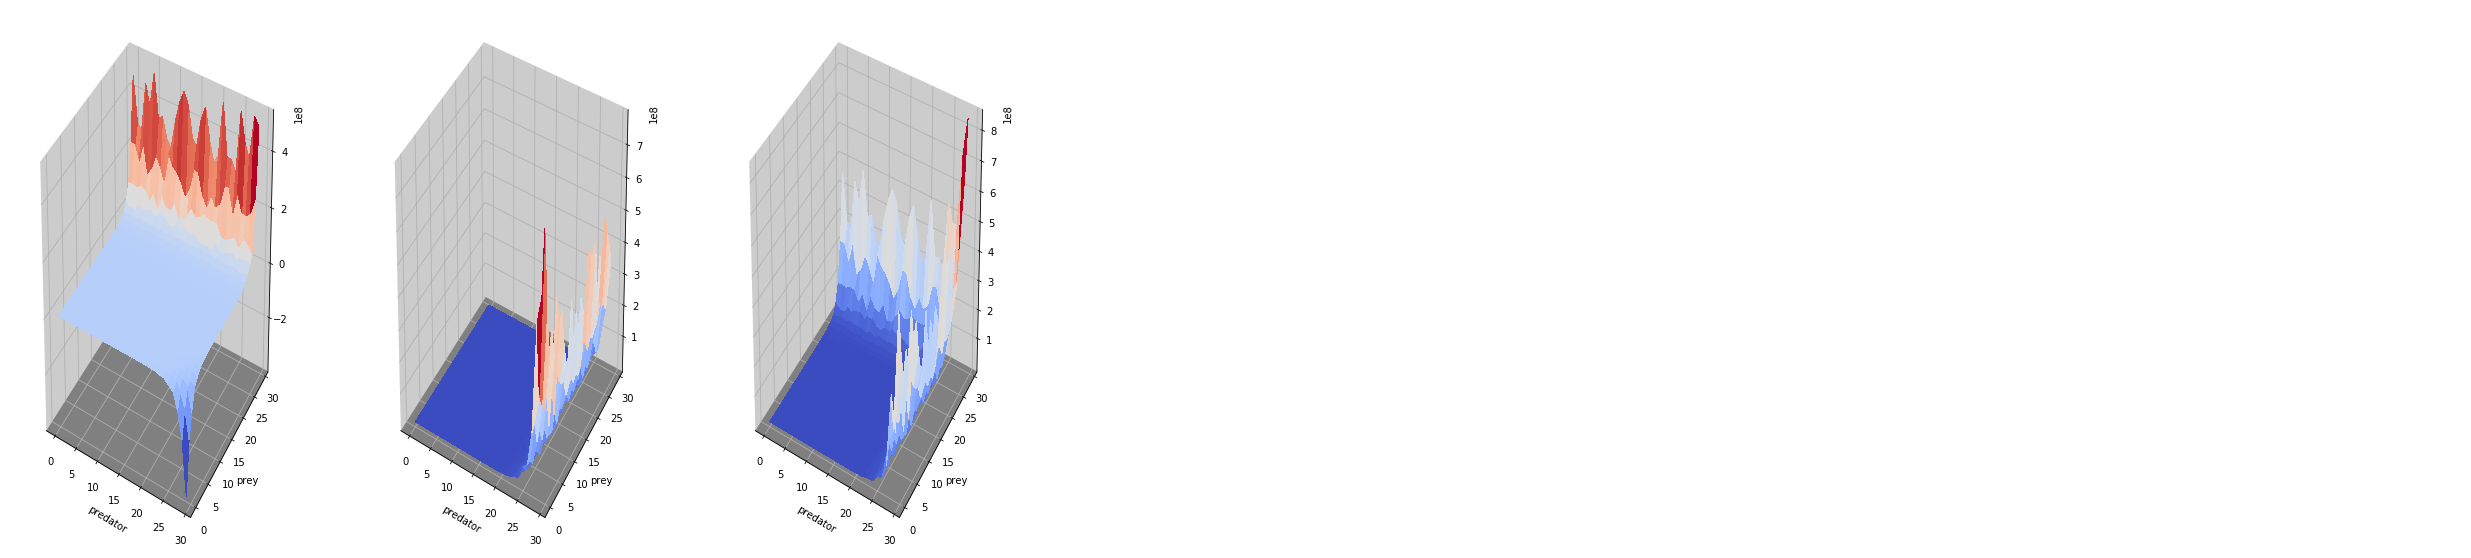

In [35]:
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1, 3, 1 , projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

surfa = ax.plot_surface(x_pred, y_prey, full_fit_land_pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('predator')
ax.set_ylabel('prey')

plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))

ax.w_zaxis.set_pane_color((0.5, 0.5, 0.5, 1.0))
surfb = ax2.plot_surface(x_pred, y_prey, full_fit_land_prey, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax2.set_xlabel('predator')
ax2.set_ylabel('prey')
ax2.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax2.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))

ax2.w_zaxis.set_pane_color((0.5, 0.5, 0.5, 1.0))

surfc = ax3.plot_surface(x_pred, y_prey, full_fit_land_sum, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax3.set_xlabel('predator')
ax3.set_ylabel('prey')
ax3.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax3.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax3.w_zaxis.set_pane_color((0.5, 0.5, 0.5, 1.0))
plt.savefig('example_fitness_landscape_comp.pdf')

In [220]:
preds = [[1,1,1, 1, 1], [1,1,1,1,1],[1,1,1, 1, 1], [1,1,1,1,1]]
preys = [[0,0,0,1,1], [1,0,0,0,0],[0,0,0,1,1], [1,0,0,0,0]]

tournements(preds,preys, 3, 5)


([12.282648440523017,
  11.970823031796622,
  11.970823031796622,
  11.970823031796622],
 [1.6487928143235961,
  0.6237948667869913,
  1.6487928143235961,
  0.6237948667869913],
 15.054508301528186)

In [403]:

def get_individual_probabilities(fitnesses):
    return  fitnesses / sum(fitnesses)


def get_max_index(probs):
    return probs.argmax()



def selection(probs,indivs, bits_per_side):
    sel = np.random.rand(len(probs)- 1)
    sel.sort()
    current_tot = 0
    index = 0
    selected = []
    for it in sel:
        while(current_tot < it):
            current_tot += probs[index]
            index += 1
        if index < len(probs) - 1:    
            selected.append(index)
        else:
            selected.append(index - 1)
    elite = indivs[probs.argmax(), :]
    return selected, elite
    
  
def fitness_prop_selection(preds, preys, bits_per_side, comps):
    pred_fit, prey_fit, obj_score = tournements(preds,preys, comps, bits_per_side)
    pred_probs = get_individual_probabilities(pred_fit)
    prey_probs = get_individual_probabilities(prey_fit)
    pred_selected, pred_elite = selection(pred_probs,  preds, bits_per_side)
    prey_selected, prey_elite = selection(prey_probs,  preys, bits_per_side)
    return pred_selected, pred_elite, np.max(pred_fit), prey_selected, prey_elite, np.max(prey_fit), obj_score

def initialise_individuals(bits_in_indiv, n_individuals):
    return np.random.randint(0,2, size=(n_individuals, bits_in_indiv))

def init_pops(n_individuals, bits_in_indiv):
    pred = initialise_individuals(bits_in_indiv, n_individuals)
    prey = initialise_individuals(bits_in_indiv, n_individuals)
    return pred, prey

def mutation(indv, mutation_rate, bits_in_indiv):
    return np.bitwise_xor(indv, np.random.uniform(0,1, size = bits_in_indiv) <= mutation_rate)

In [433]:
def round(preds, preys, bits_in_indiv, max_fit, comps):
    mutation_rate = 1 / bits_in_indiv
    pred_selected, pred_elite, max_pred_score, prey_selected, prey_elite, max_prey_score, obj_score =  fitness_prop_selection(preds, preys, bits_in_indiv, comps)
    if obj_score >= max_fit:
            return preds, preys,"max found", max_pred_score, max_prey_score
    preds_selected = preds[pred_selected,:]
    preys_selected = preys[prey_selected,:]
    mutated_preds = np.array([mutation(x, mutation_rate, bits_in_indiv) for x in preds_selected])  
    mutated_preys = np.array([mutation(x, mutation_rate, bits_in_indiv) for x in preys_selected])
    preds = np.concatenate([mutated_preds, pred_elite.reshape(1, bits_in_indiv)])
    preys = np.concatenate([mutated_preys, prey_elite.reshape(1, bits_in_indiv)])
    return preds, preys, obj_score, max_pred_score, max_prey_score

def play_rounds(preds, preys, bits_in_indiv, max_fit, comps):
    for x in range(2000):
        preds, preys, obj_score, max_pred_score, max_prey_score = round(preds, preys, bits_in_indiv, max_fit, comps)
        if obj_score == "max found":
            return x
    return -1 
        
def play_n_capture_rounds(preds, preys, bits_in_indiv, max_fit, comps):
    pred_scores = []
    prey_scores = [] 
    obj_scores = [] 
    for x in range(200):
        preds, preys, obj_score, max_pred_score, max_prey_score = round(preds, preys, bits_in_indiv, max_fit, comps)
        pred_scores.append(max_pred_score)
        prey_scores.append(max_prey_score)
        if obj_score == "max found":
            obj_scores.append(max_fit)
        else:
            obj_scores.append(obj_score)
        
    print(obj_scores)
    return pred_scores, prey_scores, obj_scores
        

In [339]:
no_indivs = 200
comps = 1
pred, prey = init_pops(5, 5)
results = pd.DataFrame(columns=['bit_size', 'round', 'comp_evo', 'comps'])

for n in range(10, 90, 10):
    for i,comp in enumerate(range(1, n, int(n / 5))):
        print(n)
        for r in range(30):
            full_fit_land_prey, full_fit_land_pred, full_fit_land_sum, x_pred, y_prey = create_set_of_fit_landscapes(n, fit_pred, fit_prey)
            max_score = np.max(full_fit_land_sum)
            pred, prey = init_pops(no_indivs, n)
            score = play_rounds(pred, prey, n, max_score, comp)
            results = results.append({'bit_size' : n, 'round' : r, 'comp_evo' : score, 'comps' : i/5}, ignore_index=True)
            print(results)



10
  bit_size round comp_evo comps
0       10     0       66     1
  bit_size round comp_evo comps
0       10     0       66     1
1       10     1      360     1
  bit_size round comp_evo comps
0       10     0       66     1
1       10     1      360     1
2       10     2       49     1
  bit_size round comp_evo comps
0       10     0       66     1
1       10     1      360     1
2       10     2       49     1
3       10     3      340     1
  bit_size round comp_evo comps
0       10     0       66     1
1       10     1      360     1
2       10     2       49     1
3       10     3      340     1
4       10     4      664     1
  bit_size round comp_evo comps
0       10     0       66     1
1       10     1      360     1
2       10     2       49     1
3       10     3      340     1
4       10     4      664     1
5       10     5      604     1
  bit_size round comp_evo comps
0       10     0       66     1
1       10     1      360     1
2       10     2       49     1
3    

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

   bit_size round comp_evo comps
0        10     0       66     1
1        10     1      360     1
2        10     2       49     1
3        10     3      340     1
4        10     4      664     1
5        10     5      604     1
6        10     6       61     1
7        10     7      865     1
8        10     8       10     1
9        10     9      387     1
10       10    10      260     1
11       10    11       76     1
12       10    12      130     1
13       10    13       50     1
14       10    14      530     1
15       10    15      153     1
16       10    16      237     1
17       10    17      203     1
18       10    18       65     1
19       10    19       99     1
20       10    20      200     1
21       10    21      352     1
22       10    22      509     1
23       10    23       15     1
24       10    24       95     1
25       10    25      463     1
26       10    26      161     1
27       10    27      803     1
28       10    28       89     1
29       1

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

    bit_size round comp_evo comps
0         10     0       66     1
1         10     1      360     1
2         10     2       49     1
3         10     3      340     1
4         10     4      664     1
5         10     5      604     1
6         10     6       61     1
7         10     7      865     1
8         10     8       10     1
9         10     9      387     1
10        10    10      260     1
11        10    11       76     1
12        10    12      130     1
13        10    13       50     1
14        10    14      530     1
15        10    15      153     1
16        10    16      237     1
17        10    17      203     1
18        10    18       65     1
19        10    19       99     1
20        10    20      200     1
21        10    21      352     1
22        10    22      509     1
23        10    23       15     1
24        10    24       95     1
25        10    25      463     1
26        10    26      161     1
27        10    27      803     1
28        10  

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

     bit_size round comp_evo comps
0          10     0       66     1
1          10     1      360     1
2          10     2       49     1
3          10     3      340     1
4          10     4      664     1
5          10     5      604     1
6          10     6       61     1
7          10     7      865     1
8          10     8       10     1
9          10     9      387     1
10         10    10      260     1
11         10    11       76     1
12         10    12      130     1
13         10    13       50     1
14         10    14      530     1
15         10    15      153     1
16         10    16      237     1
17         10    17      203     1
18         10    18       65     1
19         10    19       99     1
20         10    20      200     1
21         10    21      352     1
22         10    22      509     1
23         10    23       15     1
24         10    24       95     1
25         10    25      463     1
26         10    26      161     1
27         10    27 

In [340]:
results.to_csv('comp_results.csv')

In [ ]:
results = pd.read_csv('comp_results.csv')

In [455]:
results['comp_evo'] = pd.to_numeric(results['comp_evo'])
agg_res = results.groupby(['bit_size', 'comps'])['comp_evo'].describe()

In [458]:
new_res = agg_res[['mean', 'std']].reset_index()
new_res['comps'] = [1/5, 2/5, 3/5, 4/5, 1] * len(np.unique(new_res['bit_size']))
new_res = new_res[new_res['comps'] == 1]

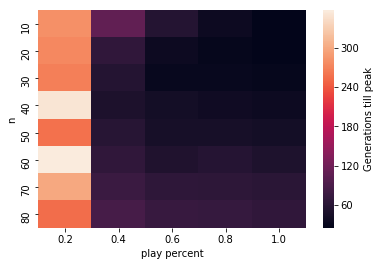

In [376]:
piv = pd.pivot_table(new_res, values="mean",index=["bit_size"], columns=["comps"], fill_value=0)
sns.heatmap(piv, cbar_kws={'label': 'Generations till peak'})
plt.xlabel('play percent')
plt.ylabel('n')
plt.savefig('heat_map_comp.pdf')

In [434]:
full_fit_land_prey, full_fit_land_pred, full_fit_land_sum, x_pred, y_prey = create_set_of_fit_landscapes(50, fit_pred, fit_prey)
max_score = np.max(full_fit_land_sum)
pred, prey = init_pops(200, 50)
pred_cap, prey_cap, obj_cap = play_n_capture_rounds(pred, prey, 50, max_score ,50)


[5542414530.7929, 3675424150.0512867, 31212069755.327652, 65416109500.05806, 135952214559.0509, 231293501022.15433, 384714192721.8284, 587774598800.0787, 1141965260350.8618, 3643551800636.5366, 6688014006997.607, 4541371884475.827, 8662451056530.734, 8662451056530.734, 8101597737922.426, 16217472082789.588, 17796749796176.88, 29788600698488.656, 25760740548195.66, 29788600698488.656, 29788600698488.656, 33174567161521.133, 55798921577783.06, 52937675270903.24, 78621154026543.34, 125195845031259.69, 125195845031259.69, 141163040550159.84, 172437230003199.44, 177427913152747.44, 172437230003199.44, 283677346336483.44, 321449257857094.25, 325015584756658.9, 677276074838878.9, 677276074838878.9, 677276074838878.9, 761872419976595.5, 516884312787183.9, 677276074838878.9, 677276074838878.9, 761872419976595.5, 597335834053861.5, 677276074838878.9, 677276074838878.9, 540477889093488.44, 761872419976595.5, 761872419976595.5, 597330530066514.4, 597335834053861.5, 761872419976595.5, 6772760748388

In [435]:
max_prey = np.max(full_fit_land_prey)
max_pred = np.max(full_fit_land_pred)
max_obj = np.max(full_fit_land_sum)

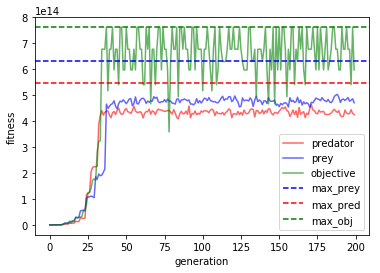

In [450]:
plt.plot(pred_cap, label = 'predator', alpha=0.6, c = 'red')
plt.plot(prey_cap, label = 'prey', alpha=0.6, c = 'blue')
plt.plot(obj_cap, label= 'objective', alpha=0.6, c= 'green')
plt.axhline(max_prey, label = 'max_prey', c = 'blue', linestyle= '--')
plt.axhline(max_pred, label = 'max_pred', c= 'red', linestyle= '--')
plt.axhline(max_obj, label = 'max_obj', c = 'green', linestyle= '--')
plt.xlabel('generation')
plt.ylabel('fitness')
plt.legend()
plt.savefig('n50maxCompPlottingPreyVsPred')

In [451]:
results_cross = pd.read_csv("results.csv")
results_cross['crossover'] = pd.to_numeric(results_cross['crossover'])
results_cross['mutation'] = pd.to_numeric(results_cross['mutation'])
results_cross = results_cross.replace(-1, np.nan)

In [453]:
desc= results_cross.groupby(['bit_size'])['crossover', 'mutation'].describe()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


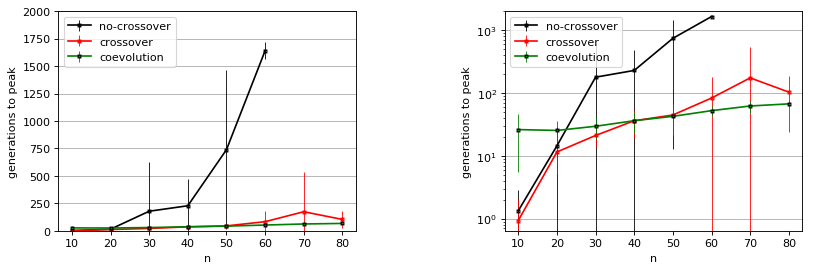

In [463]:
cross_mean = desc['crossover']['mean']
cross_std = desc['crossover']['std']
cross_bit = desc.index

mut_mean = desc['mutation']['mean']
mut_std = desc['mutation']['std']
mut_bit = desc.index

comp_mean = new_res['mean']
comp_std = new_res['std']
comp_bit = new_res['bit_size']

fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.add_subplot(2,2, 1)
ax.errorbar(mut_bit, mut_mean, mut_std, marker='s', mfc='black',
         mec='black', ms=0.5, mew=3,elinewidth = 0.75, label = 'no-crossover', ecolor = "black", color = "black")

ax.errorbar(cross_bit, cross_mean, cross_std, marker='s', mfc='red',
         mec='red', ms=0.5, mew=3,elinewidth = 0.75, label = 'crossover', ecolor = "red", color = "red")

ax.errorbar(comp_bit, comp_mean, comp_std, marker='s', mfc='green',
         mec='black', ms=0.5, mew=3,elinewidth = 0.75, label = 'coevolution', ecolor = "green", color = "green")
plt.gca().yaxis.grid(True)
plt.xlabel('n')

plt.gca().set_ylim([0,2000])
plt.ylabel('generations to peak')
plt.legend(loc = 'upper left')

ax2 = fig.add_subplot(2,2, 2)
ax2.errorbar(mut_bit, mut_mean, mut_std, marker='s', mfc='black',
         mec='black', ms=0.5, mew=3,elinewidth = 0.75, label = 'no-crossover', ecolor = "black", color = "black")

ax2.errorbar(cross_bit, cross_mean, cross_std, marker='s', mfc='red',
         mec='red', ms=0.5, mew=3,elinewidth = 0.75, label = 'crossover', ecolor = "red", color = "red")

ax2.errorbar(comp_bit, comp_mean, comp_std, marker='s', mfc='green',
         mec='black', ms=0.5, mew=3,elinewidth = 0.75, label = 'coevolution', ecolor = "green", color = "green")

plt.gca().yaxis.grid(True)
plt.xlabel('n')
plt.ylabel('generations to peak')
plt.legend(loc = 'upper left')
plt.yscale('log')
plt.gca().set_ylim([0,2000])
plt.subplots_adjust(wspace = 0.5)

plt.savefig('results_additonal(max_comp).pdf')

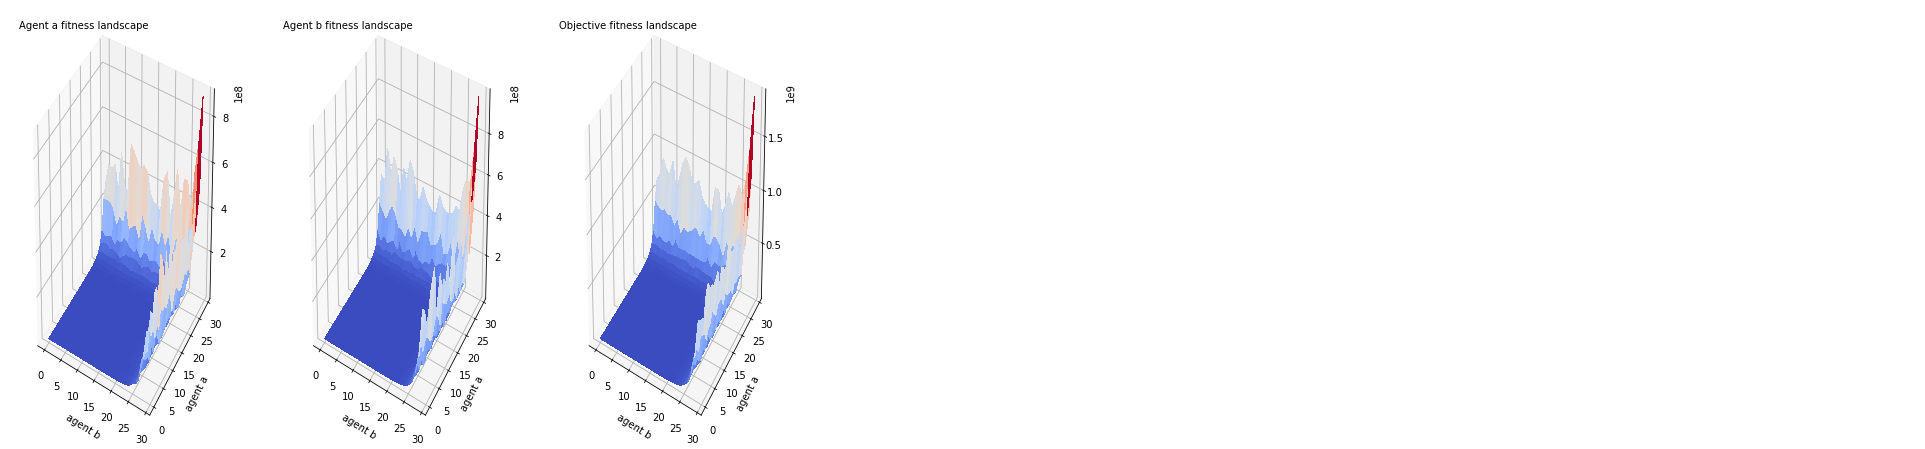

In [481]:

full_fit_land_prey, full_fit_land_pred, full_fit_land_sum, x_pred, y_prey = create_set_of_fit_landscapes(30, fit_coop_pred, fit_coop_prey)
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 3, 1 , projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

surfa = ax.plot_surface(x_pred, y_prey, full_fit_land_pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('agent b')
ax.set_ylabel('agent a')

surfb = ax2.plot_surface(x_pred, y_prey, full_fit_land_prey, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax2.set_xlabel('agent b')
ax2.set_ylabel('agent a')

surfc = ax3.plot_surface(x_pred, y_prey, full_fit_land_sum, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.text2D(0.05, 0.95, "Agent a fitness landscape", transform=ax.transAxes)
ax2.text2D(1.2, 0.95, "Agent b fitness landscape", transform=ax.transAxes)
ax3.text2D(2.4, 0.95, "Objective fitness landscape", transform=ax.transAxes)
ax3.set_xlabel('agent b')
ax3.set_ylabel('agent a')
plt.savefig('example_fitness_landscape_coop.pdf')

In [482]:
no_indivs = 200
comps = 1
pred, prey = init_pops(5, 5)
results_coop = pd.DataFrame(columns=['bit_size', 'round', 'comp_evo', 'comps'])

for n in range(10, 90, 10):
    for i,comp in enumerate(range(1, n, int(n / 5))):
        print(comp)
        print(n)
        for r in range(30):
            full_fit_land_prey, full_fit_land_pred, full_fit_land_sum, x_pred, y_prey = create_set_of_fit_landscapes(n, fit_coop_prey, fit_coop_pred)
            max_score = np.max(full_fit_land_sum)
            pred, prey = init_pops(no_indivs, n)
            score = play_rounds(pred, prey, n, max_score, comp)
            results_coop = results_coop.append({'bit_size' : n, 'round' : r, 'comp_evo' : score, 'comps' : i}, ignore_index=True)
            print(results_coop)



10
  bit_size round comp_evo comps
0       10     0       -1     0
  bit_size round comp_evo comps
0       10     0       -1     0
1       10     1      511     0
  bit_size round comp_evo comps
0       10     0       -1     0
1       10     1      511     0
2       10     2       -1     0
  bit_size round comp_evo comps
0       10     0       -1     0
1       10     1      511     0
2       10     2       -1     0
3       10     3       -1     0
  bit_size round comp_evo comps
0       10     0       -1     0
1       10     1      511     0
2       10     2       -1     0
3       10     3       -1     0
4       10     4       -1     0
  bit_size round comp_evo comps
0       10     0       -1     0
1       10     1      511     0
2       10     2       -1     0
3       10     3       -1     0
4       10     4       -1     0
5       10     5      442     0
  bit_size round comp_evo comps
0       10     0       -1     0
1       10     1      511     0
2       10     2       -1     0
3    

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

   bit_size round comp_evo comps
0        10     0       -1     0
1        10     1      511     0
2        10     2       -1     0
3        10     3       -1     0
4        10     4       -1     0
5        10     5      442     0
6        10     6     1910     0
7        10     7       -1     0
8        10     8      388     0
9        10     9      116     0
10       10    10      881     0
11       10    11      888     0
12       10    12      176     0
13       10    13       -1     0
14       10    14      403     0
15       10    15      103     0
16       10    16      508     0
17       10    17       -1     0
18       10    18       60     0
19       10    19      241     0
20       10    20       45     0
21       10    21      321     0
22       10    22     1040     0
23       10    23      268     0
24       10    24      364     0
25       10    25      305     0
26       10    26       -1     0
27       10    27      795     0
28       10    28       82     0
29       1

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

    bit_size round comp_evo comps
0         10     0       -1     0
1         10     1      511     0
2         10     2       -1     0
3         10     3       -1     0
4         10     4       -1     0
5         10     5      442     0
6         10     6     1910     0
7         10     7       -1     0
8         10     8      388     0
9         10     9      116     0
10        10    10      881     0
11        10    11      888     0
12        10    12      176     0
13        10    13       -1     0
14        10    14      403     0
15        10    15      103     0
16        10    16      508     0
17        10    17       -1     0
18        10    18       60     0
19        10    19      241     0
20        10    20       45     0
21        10    21      321     0
22        10    22     1040     0
23        10    23      268     0
24        10    24      364     0
25        10    25      305     0
26        10    26       -1     0
27        10    27      795     0
28        10  

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

     bit_size round comp_evo comps
0          10     0       -1     0
1          10     1      511     0
2          10     2       -1     0
3          10     3       -1     0
4          10     4       -1     0
5          10     5      442     0
6          10     6     1910     0
7          10     7       -1     0
8          10     8      388     0
9          10     9      116     0
10         10    10      881     0
11         10    11      888     0
12         10    12      176     0
13         10    13       -1     0
14         10    14      403     0
15         10    15      103     0
16         10    16      508     0
17         10    17       -1     0
18         10    18       60     0
19         10    19      241     0
20         10    20       45     0
21         10    21      321     0
22         10    22     1040     0
23         10    23      268     0
24         10    24      364     0
25         10    25      305     0
26         10    26       -1     0
27         10    27 

In [483]:
results_coop.to_csv('results_coop.csv')